In [1]:
# SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f, chi2, binom

import warnings
warnings.filterwarnings('ignore')

# 1. Uma proporção:
Foi informado o valor do baseline e fornecido uma amostra da produção. A incerteza provém somente da amostra de produção.
- p0: Baseline
- pObs: Produção
- n: Tamanho da amostra de produção
- MDE: Diferença mínima relevante para o business
- alpha: 0,05
- beta: 0,2

In [2]:
# Exemplo
p0    = 0.90
pObs  = 0.84
MDE   = 0.05
p1    = p0 - MDE
n     = 150
alpha = 0.05
beta  = 0.2

## 1.1 Realização do teste de hipótese:

In [3]:
# H0: p = p0: O valor observado provém do acaso da amostragem, e não temos evidência para rejeitar H0 em favor de H1.
# H0: p < p0: De fato a proporção em produção é inferior ao baseline.

### 1.1.2 Aproximação Normal:

In [4]:
# Requisitos para aproximação normal -> OK
print(int(n*p0))     # deve ser >= 10
print(int(n*(1-p0))) # deve ser >= 10

135
14


In [5]:
# Sob H0:

## Padronizando o valor observado
SE0 = np.sqrt(p0*(1-p0)/n)
Z_obs = (pObs - p0)/SE0
print(f"Z_obs = {np.round(Z_obs, 2)}")

## Calculando p_value (probabilidade do acaso gerar um valor menor ou igual ao observado)
p_value = norm.cdf(Z_obs)

## Decisão
if p_value <= alpha:
    print(f"p-valor = {p_value:.4f} ≤ α = {alpha} → Rejeitamos H0")
else:
    print(f"p-valor = {p_value:.4f} > α = {alpha} → Não rejeitamos H0")

Z_obs = -2.45
p-valor = 0.0072 ≤ α = 0.05 → Rejeitamos H0


### 1.1.3 Teste Exato: X sucessos em n tentativas
A Binomial modela o nº de sucessos em n tentativas fixas e independentes, cada uma com probabilidade p constante de sucesso (população grande).


In [6]:
# Sob H0:
p     = p0     # probabilidade de sucesso
x_obs = n*pObs # número de sucessos observados
n     = n      # tentativas

## Prbabilidade de observar um número de sucessos menor ou igual ao observado, somente pelo efeito do acaso.
p_value = binom.cdf(x_obs, n, p0)

## Decisão
if p_value <= alpha:
    print(f"p-valor = {p_value:.4f} ≤ α = {alpha} → Rejeitamos H0")
else:
    print(f"p-valor = {p_value:.4f} > α = {alpha} → Não rejeitamos H0")

p-valor = 0.0143 ≤ α = 0.05 → Rejeitamos H0


# 1.2 Poder do Teste:

<img src="img/d1.jpeg" width="500">
<img src="img/d2.jpeg" width="500">

### 1.2.1 Aproximação Normal:

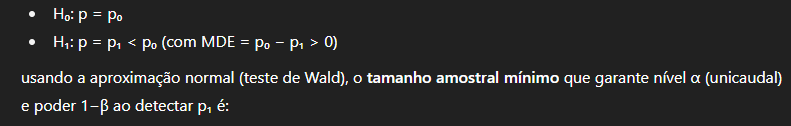

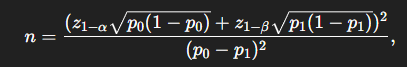

In [7]:
Z_1_alpha = norm.ppf(1-alpha)
Z_1_beta  = norm.ppf(1-beta)
n_min     = int(np.ceil(((Z_1_alpha*np.sqrt(p0*(1-p0)) + Z_1_beta*np.sqrt(p1*(1-p1)))**2)/((p0-p1)**2)))
print(f"""
>>>> Para detectar uma diferença mínima de {int(np.round(MDE*100,0))}p.p. em {int((1-beta)*100)}% das vezes que de fato ela ocorrer.
>>>> Sob o risco de dizer que essa diferença ocorre em no máximo {int((alpha)*100)}% dos casos onde de fato ela não ocorre.
>>>> Precisamos de um n_min = {n_min}.
""")


>>>> Para detectar uma diferença mínima de 5p.p. em 80% das vezes que de fato ela ocorrer.
>>>> Sob o risco de dizer que essa diferença ocorre em no máximo 5% dos casos onde de fato ela não ocorre.
>>>> Precisamos de um n_min = 253.



### 1.2.2 Teste Exato: X sucessos em n tentativas

In [8]:
def n_min_binomial(p0, p1, alpha=0.05, beta=0.2, n_max=10000):

    # Para cada n (tentativas possíveis)
    for n in range(1, n_max+1):

        # Sob H0: Rejeitamos H0 quando -> P_H0(X <= xc) <= alpha
        # Avaliar todo os números de sucesso (xc) dentro de um dado n
        for xc in range(n, -1, -1):

            if binom.cdf(xc, n, p0) <= alpha: # P_H0(X <= xc) <= alpha
                
                # Sob H1: P_H1(X <= xc) = 1 - beta 
                # Queremos power >= 1 - beta
                power = binom.cdf(xc, n, p1)
                if power >= 1-beta:
                    return n
    return None

# exemplo
n_min = n_min_binomial(p0=p0, p1=p1, alpha=alpha, beta=beta)
print(f"""
>>>> Para detectar uma diferença mínima de {int(np.round(MDE*100,0))}p.p. em {int((1-beta)*100)}% das vezes que de fato ela ocorrer.
>>>> Sob o risco de dizer que essa diferença ocorre em no máximo {int((alpha)*100)}% dos casos onde de fato ela não ocorre.
>>>> Precisamos de um n_min = {n_min}.
""")



>>>> Para detectar uma diferença mínima de 5p.p. em 80% das vezes que de fato ela ocorrer.
>>>> Sob o risco de dizer que essa diferença ocorre em no máximo 5% dos casos onde de fato ela não ocorre.
>>>> Precisamos de um n_min = 270.



# 2. Duas proporções:
Foi passado duas amostras, uma do baseline e outra da produção.
- pA: Baseline
- pB: Produção
- nA: Tamanho da amostra baseline
- nB: Tamanho da amostra produção
- MDE: Diferença mínima relevante para o business
- alpha: 0,05
- beta: 0,2

## 2.1 Realização do teste de hipótese:

In [9]:
# H0: pA - pB = 0: O valor observado provém do acaso da amostragem, e não temos evidência para rejeitar H0 em favor de H1.
# H0: pA - pB > 0: De fato a proporção em produção é inferior ao baseline.